In [1]:
import pandas as pd

In [3]:
df = pd.read_csv(r"F:\Programming\ALX\Data Science\Python\Integrated Projects\MD_agric_exam-4313.csv")

In [11]:
len(df["Crop_type"].unique())

array(['coffee', 'potato', 'banana', 'wheat', 'cassava', 'maize', 'tea',
       'rice'], dtype=object)

In [16]:
wheat_df = df[df["Crop_type"] == "wheat"]
wheat_df["Annual_yield"].round(2).max()

8.99

In [25]:
avg_pollution_above_2 = df.groupby("Crop_type").agg({
    "Pollution_level": "mean",
    "Rainfall": "sum"
})
avg_pollution_above_2 = avg_pollution_above_2[avg_pollution_above_2["Pollution_level"] > 0.2]
avg_pollution_above_2["Rainfall"].sum()

941959.7000000001

In [48]:

# def calc_temp_range(*ids):
#     dct = {}
    
#     for id in ids:
#         dct[id] = df[df["Field_ID"] == id]["Max_temperature_C"] - df[df["Field_ID"] == id]["Min_temperature_C"]
        
#     return list(dct)

# calc_temp_range(*[, '1895', '5443'])

def calc_temp_range(id):
    # Filter the DataFrame for the given Field_ID
    id_series = df[df["Field_ID"] == id]
    
    # Check if the ID exists in the DataFrame
    if id_series.empty:
        return f"Field ID {id} not found"
    
    # Calculate the temperature range (Max_temperature_C - Min_temperature_C)
    temp_range = id_series["Max_temperature_C"].iloc[0] - id_series["Min_temperature_C"].iloc[0]
    
    return temp_range

# Call the function for Field_IDs: 1458, 1895, 5443
result_1458 = calc_temp_range(1458)
result_1895 = calc_temp_range(1895)
result_5443 = calc_temp_range(5443)

# Print the results
print(f"Temperature range for Field_ID 1458: {result_1458}")
print(f"Temperature range for Field_ID 1895: {result_1895}")
print(f"Temperature range for Field_ID 5443: {result_5443}")



Temperature range for Field_ID 1458: 40.7
Temperature range for Field_ID 1895: 35.7
Temperature range for Field_ID 5443: 33.4


In [52]:
a = df['Crop_type'].unique()

b = float('inf')

c = ''

for crop in a:

    d = df[df['Crop_type'] == crop]['Min_temperature_C'].mean()

    if d < b:

        b = d

        c = crop

print(c)

inf

In [4]:
df.head(3)

,Field_ID,Elevation,Rainfall,Min_temperature_C,Max_temperature_C,pH,Pollution_level,Plot_size,Annual_yield,Crop_type
0,1162,494.95615,1507.6,-5.4,31.0,6.859436,0.007034,3.6,1.617421,coffee
1,5108,663.73390,581.0,-4.7,30.9,5.603219,0.289643,4.2,2.532497,potato
2,3504,396.87990,1715.1,-6.1,31.7,5.774116,0.000409,2.6,1.262207,banana


In [53]:
df[df["pH"] < 5.5]["Plot_size"].sum()

1731.8999999999999

In [58]:
cust_df = df.query("Min_temperature_C < -5 and Max_temperature_C > 30")
cust_df.count()

Field_ID             319
Elevation            319
Rainfall             319
Min_temperature_C    319
Max_temperature_C    319
pH                   319
Pollution_level      319
Plot_size            319
Annual_yield         319
Crop_type            319
dtype: int64

In [59]:
import numpy as np

# Assuming `df` is your DataFrame

# Step 1: Calculate the median of the 'Plot_size'
median_plot_size = np.median(df['Plot_size'])

# Step 2: Filter the dataset to include only rows where 'Plot_size' is larger than the median
filtered_df = df[df['Plot_size'] > median_plot_size]

# Step 3: Calculate the standard deviation of 'Rainfall' for the filtered rows
std_dev_rainfall = np.std(filtered_df['Rainfall'])

# Step 4: Round the result to 2 decimal places
std_dev_rainfall_rounded = round(std_dev_rainfall, 2)

# Print the result
print(f"Standard deviation of 'Rainfall' for plots larger than the median plot size: {std_dev_rainfall_rounded}")


Standard deviation of 'Rainfall' for plots larger than the median plot size: 469.62


In [82]:
first_3 = str(df["Max_temperature_C"].value_counts().index[0])[:3]
last_3 = df["Crop_type"].value_counts(ascending=True).index[0][-3:]

result = first_3 + last_3
result

'30.ice'

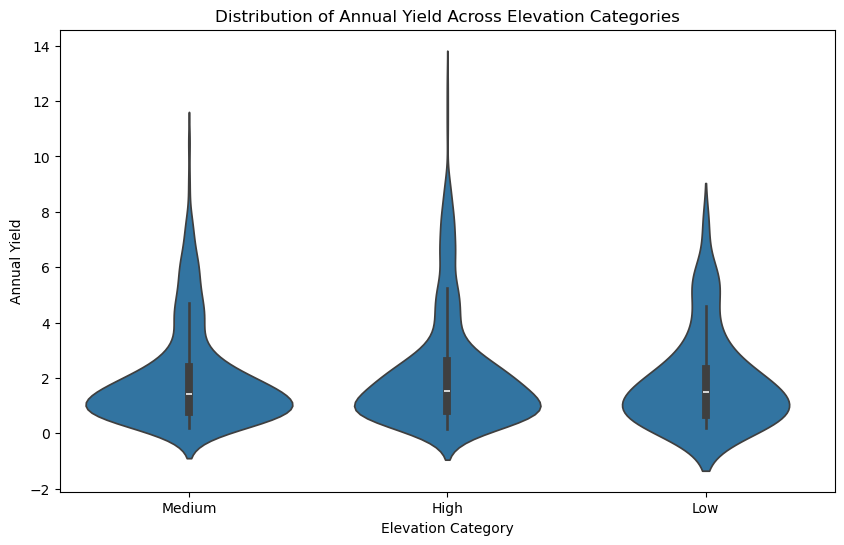

In [83]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `df` is your DataFrame that includes 'Annual_yield' and 'Elevation' columns

# Step 1: Categorize the 'Elevation' values into Low, Medium, and High categories
def categorize_elevation(elevation):
    if elevation < 300:
        return 'Low'
    elif 300 <= elevation <= 600:
        return 'Medium'
    else:
        return 'High'

# Apply the function to the 'Elevation' column
df['Elevation_Category'] = df['Elevation'].apply(categorize_elevation)

# Step 2: Create a violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Elevation_Category', y='Annual_yield', data=df)

# Step 3: Add labels and title for better clarity
plt.title('Distribution of Annual Yield Across Elevation Categories')
plt.xlabel('Elevation Category')
plt.ylabel('Annual Yield')

# Show the plot
plt.show()


In [89]:
def croptypesum(croptype,index = 0):
    if index > 7:
        return 0
    return len(croptype[index]) + croptypesum(croptype, index = index+1)
croptypesum(df["Crop_type"].unique())

42

In [90]:
import pandas as pd
from scipy import stats

# Assuming `df` is your DataFrame that includes 'Annual_yield' and 'Crop_type' columns

# Filter the data for coffee and banana crop types
coffee_yield = df[df['Crop_type'] == 'coffee']['Annual_yield']
banana_yield = df[df['Crop_type'] == 'banana']['Annual_yield']

# Perform a t-test on the two samples
t_stat, p_value = stats.ttest_ind(coffee_yield, banana_yield)

# Print the p-value rounded to three decimal places
print(f"P-value: {round(p_value, 3)}")


P-value: 0.598
